<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Desribe-data" data-toc-modified-id="Desribe-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Desribe data</a></span><ul class="toc-item"><li><span><a href="#Sample-size" data-toc-modified-id="Sample-size-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sample size</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Histograms</a></span></li></ul></li><li><span><a href="#Kendall's-Tau-correlation" data-toc-modified-id="Kendall's-Tau-correlation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kendall's Tau correlation</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kendalltau
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
df = pd.read_csv('data/cleaned_data_gca.csv')

# Exploratory data analysis

## Desribe data

### Sample size

In [3]:
print('Sample size socio-demographics =', df[df.columns[0]].count())
print('Sample size psychological variables =', df[df.columns[4]].count())

Sample size socio-demographics = 33
Sample size psychological variables = 34


### Descriptive statistics

**Descriptive statistics for numeric data**

In [4]:
descriptive_stat = df.describe()
descriptive_stat = descriptive_stat.T
descriptive_stat['skew'] = df.skew()
descriptive_stat['kurtosis'] = df.kurt()
descriptive_stat.insert(loc=5, column='median', value=df.median())

descriptive_stat=descriptive_stat.apply(pd.to_numeric, errors='ignore')

In [5]:
descriptive_stat

,count,mean,std,min,25%,median,50%,75%,max,skew,kurtosis
age,33.0,26.151515,10.323278,14.0,20.000,24.00,24.00,30.000,67.0,2.134022,6.764676
income,33.0,4.030303,1.740777,1.0,3.000,5.00,5.00,5.000,7.0,-0.427669,-0.607067
reference persons,34.0,2.823529,0.968303,1.0,2.000,3.00,3.00,3.000,5.0,0.374759,0.082675
injunctive norm,34.0,4.088235,1.621216,1.0,3.000,4.00,4.00,5.000,7.0,-0.150989,-0.672836
descriptive norm,34.0,2.382353,1.073502,1.0,2.000,2.00,2.00,3.000,5.0,0.558972,-0.335302
perceived consumer effectiveness,34.0,5.382353,1.557284,2.0,4.250,5.50,5.50,7.000,7.0,-0.534530,-0.907733
social desireability,34.0,3.823529,1.546660,1.0,3.000,4.00,4.00,5.000,7.0,-0.052394,-0.542942
environmental attitudes,34.0,6.205882,0.993293,2.5,6.000,6.50,6.50,7.000,7.0,-1.968146,5.024603
technosalvation,34.0,4.823529,1.585361,1.0,4.000,5.00,5.00,6.000,7.0,-0.904217,0.582199
personal affectedness,34.0,5.088235,1.602416,2.0,4.000,5.00,5.00,6.750,7.0,-0.293075,-1.119637


**Descriptive statistics for categorical data**

In [6]:
for col in list(df[['gender','education level']]):
  print('variable:', col)
  print(df[col].value_counts(dropna=False).to_string())
  print('')

variable: gender
Männlich    18
Weiblich    14
Divers       1
NaN          1

variable: education level
Hochschulabschluss          16
Abitur                       8
derzeit noch Schüler\*in     5
derzeit noch Schüler/*in     3
Fachhochschulabschluss       1
NaN                          1



### Shapiro-Wilk Test

In [7]:
# define Shapiro Wilk Test function
def shapiro_test(data):
    '''calculate K-S Test for and out  results in table'''    
    data = data._get_numeric_data()
    data_shapiro_test = pd.DataFrame()
    
    # Iterate over columns, calculate test statistic & create table
    for column in data: 
        column_shapiro_test = shapiro(data[column])
        shapiro_pvalue_column = column_shapiro_test.pvalue
        if column_shapiro_test.pvalue < .05:
            shapiro_pvalue_column = '{:.6f}'.format(shapiro_pvalue_column) + '*'
            column_distr = 'non-normal'
        else:
            column_distr = 'normal'
        new_row = {'variable': column, 
                   'Shapiro Wilk p-value': shapiro_pvalue_column, 
                   'Shapiro Wilk statistic': column_shapiro_test.statistic,
                   'distribution': column_distr
                  }
        data_shapiro_test = data_shapiro_test.append(new_row, ignore_index=True)
        data_shapiro_test = data_shapiro_test[['variable', 'Shapiro Wilk statistic', 'Shapiro Wilk p-value', 'distribution']]
    return data_shapiro_test

In [8]:
shapiro_test(df.dropna())

,variable,Shapiro Wilk statistic,Shapiro Wilk p-value,distribution
0,age,0.820324,0.000081*,non-normal
1,income,0.906114,0.007705*,non-normal
2,reference persons,0.896892,0.004429*,non-normal
3,injunctive norm,0.952145,0.15364,normal
4,descriptive norm,0.878762,0.001566*,non-normal
5,perceived consumer effectiveness,0.873441,0.001168*,non-normal
6,social desireability,0.953153,0.164366,normal
7,environmental attitudes,0.758917,0.000006*,non-normal
8,technosalvation,0.887147,0.002513*,non-normal
9,personal affectedness,0.894349,0.003813*,non-normal


### Histograms

**Histograms: Likert-scale variables**

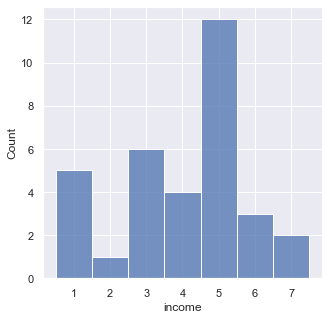

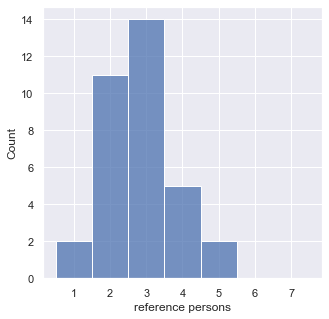

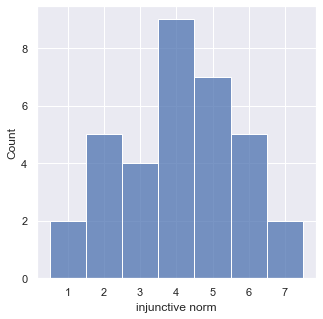

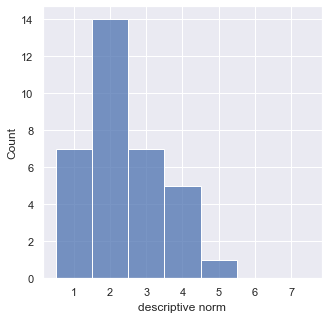

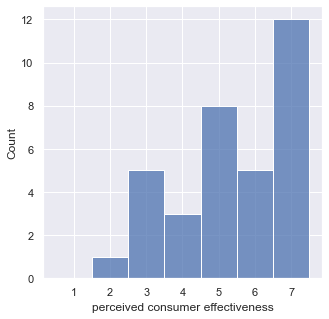

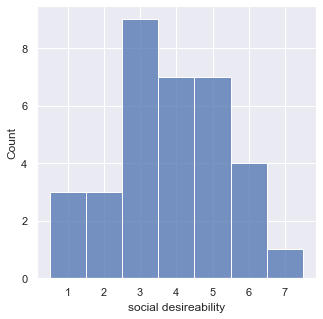

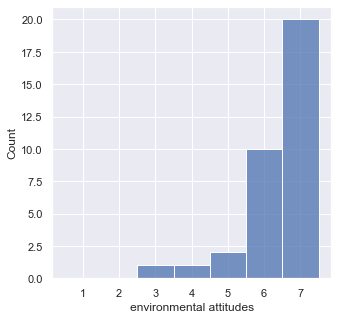

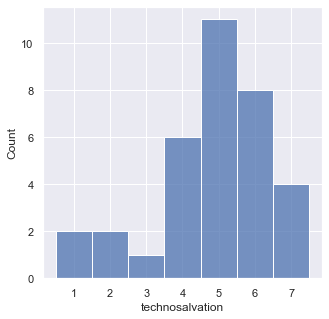

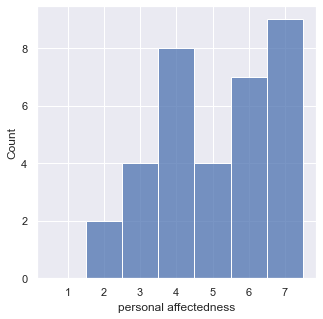

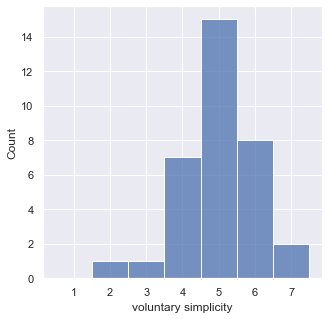

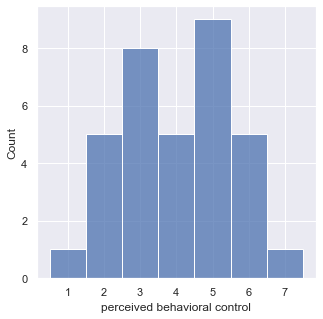

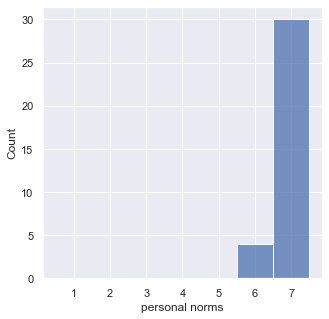

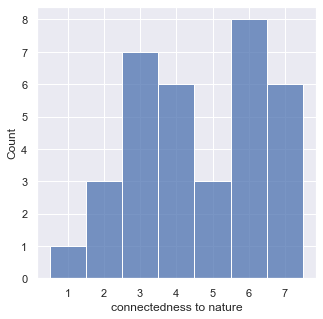

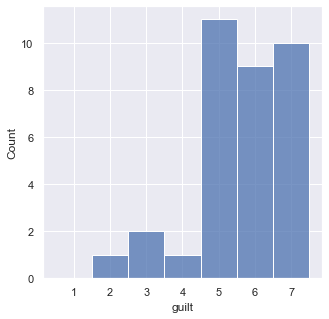

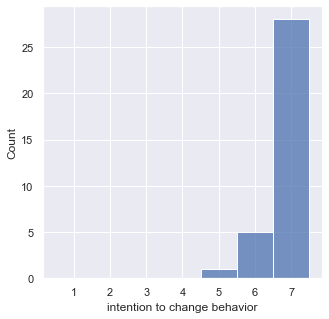

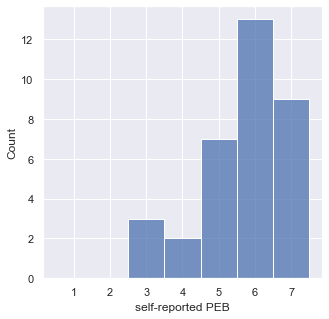

In [9]:
for column in df._get_numeric_data().drop(columns=['assessed PEB','age']):
    sns.set(rc={'figure.figsize':(5,5)})
    data = df[column]
    sns.histplot(data, bins=np.arange(1,9)-.5) 
    plt.xlabel(column)
    plt.show()

**Histogramm: age**

<AxesSubplot:xlabel='age', ylabel='Count'>

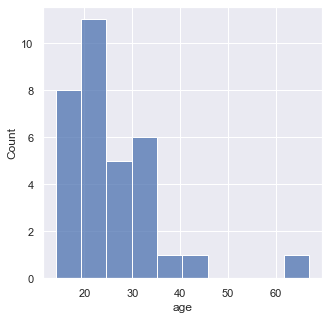

In [10]:
sns.histplot(df['age'], bins=10)

**Histogramm: assessed PEB**

<AxesSubplot:xlabel='assessed PEB', ylabel='Count'>

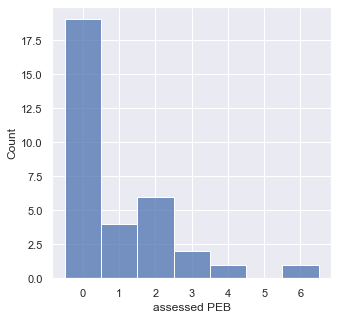

In [11]:
sns.histplot(df['assessed PEB'], bins=np.arange(0,8)-.5)

## Kendall's Tau correlation

In [12]:
# create df with correlation coefficient and p-value indication
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

# calculate kendall's tau correlation with p values ( < .01 = ***, < .05 = **, < .1 = *)
tau = df.corr(method = 'kendall').round(decimals=2)

pval = df.corr(method=kendall_pval) - np.eye(*tau.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.1,0.05] if x<=t]))
tau_corr_with_p_values = tau.round(4).astype(str) + p

In [13]:
# set colored highlights for correlation matri
def color_sig_blue(val):
    """
    color all significant values in blue
    """
    color = 'blue' if val.endswith('*') else 'black'
    return 'color: %s' % color

In [14]:
tau_corr_with_p_values.style.applymap(color_sig_blue)

,age,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
age,1.0**,0.14,-0.13,0.04,0.23*,-0.27**,-0.18,-0.13,0.15,-0.17,0.13,0.05,-0.12,-0.03,-0.15,0.06,0.15,-0.29**
income,0.14,1.0**,0.02,0.13,0.02,-0.37**,-0.12,0.04,0.25*,-0.01,-0.16,-0.01,-0.24,-0.26*,-0.03,-0.15,-0.17,-0.31**
reference persons,-0.13,0.02,1.0**,0.05,-0.18,0.15,0.27*,-0.24*,0.22,-0.02,-0.27*,-0.29**,-0.11,-0.28*,-0.24*,-0.31**,0.02,0.07
injunctive norm,0.04,0.13,0.05,1.0**,0.28**,-0.27*,-0.11,-0.15,0.15,0.0,0.05,-0.08,-0.25,-0.12,-0.31**,-0.17,-0.04,-0.15
descriptive norm,0.23*,0.02,-0.18,0.28**,1.0**,-0.05,-0.33**,-0.1,0.25*,0.12,0.13,0.34**,-0.23,0.2,-0.1,-0.11,0.2,-0.18
perceived consumer effectiveness,-0.27**,-0.37**,0.15,-0.27*,-0.05,1.0**,-0.05,-0.06,-0.17,0.29**,0.05,0.14,0.25,0.07,0.25*,0.28*,0.14,0.21
social desireability,-0.18,-0.12,0.27*,-0.11,-0.33**,-0.05,1.0**,0.09,-0.13,-0.15,-0.2,-0.19,-0.04,-0.14,-0.21,-0.09,-0.25*,0.17
environmental attitudes,-0.13,0.04,-0.24*,-0.15,-0.1,-0.06,0.09,1.0**,-0.02,0.03,-0.14,0.06,0.24,0.07,0.17,0.34**,0.11,0.23
technosalvation,0.15,0.25*,0.22,0.15,0.25*,-0.17,-0.13,-0.02,1.0**,0.07,-0.14,0.1,-0.04,0.06,-0.22,-0.15,0.04,0.01
personal affectedness,-0.17,-0.01,-0.02,0.0,0.12,0.29**,-0.15,0.03,0.07,1.0**,-0.01,0.1,0.09,0.1,0.27*,0.09,0.18,0.05


## Correlation Heatmap

All not significant correlations (p < .05) are not shown.

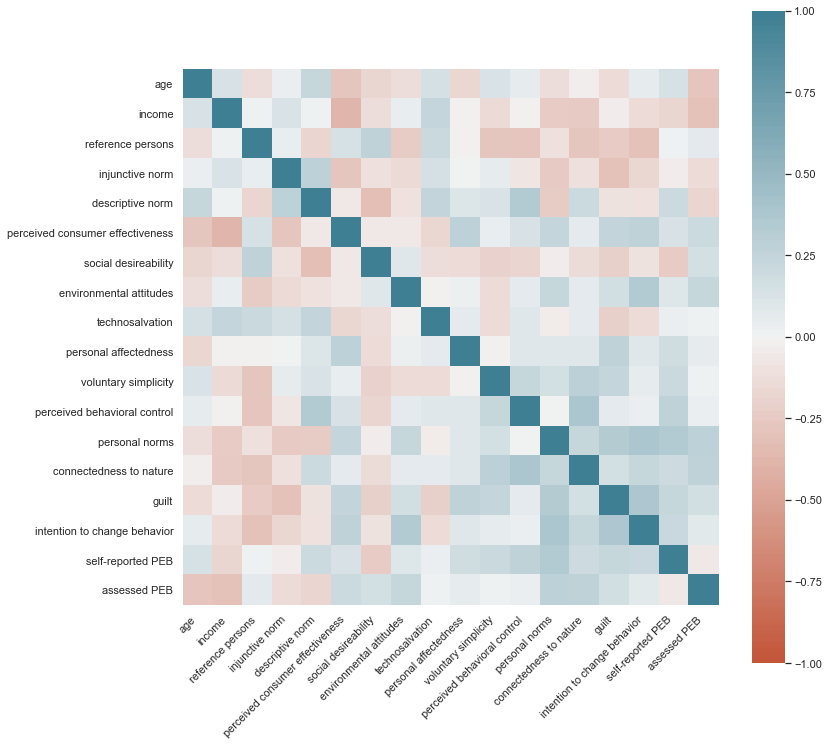

In [15]:
# calculate correlation coefficient
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

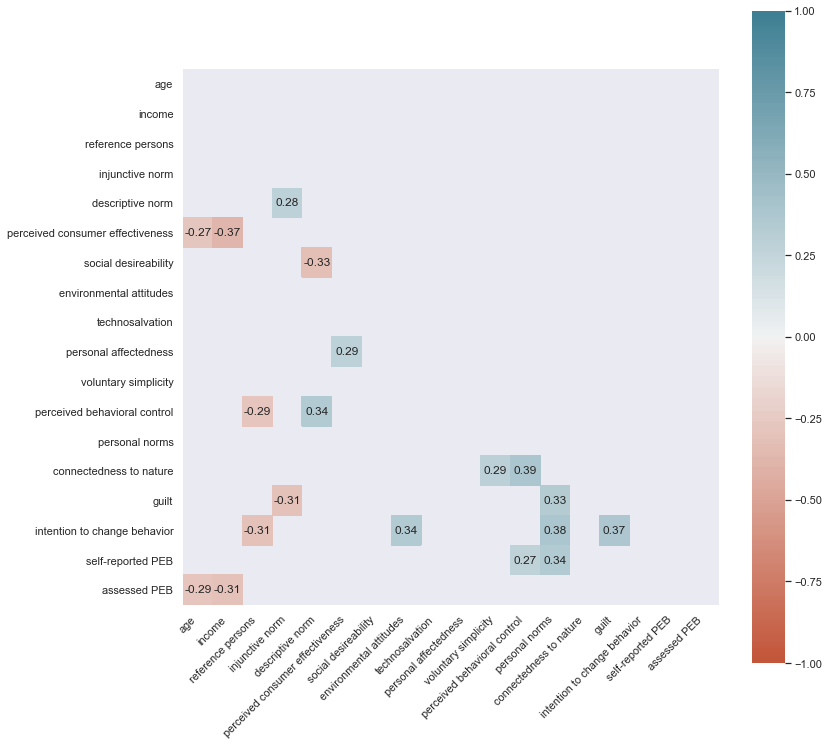

In [16]:
# calculate correlation coefficient and p-values
corr_p_values = df.corr(method = kendall_pval)
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

#set mask for only significant values (p <= .05)
mask = np.invert(np.tril(corr_p_values<.05))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()